# Seaborn

- NumPy: Matplotlib -> Pandas: Seaborn
- Matplotlib specialized for pandas DataFrames
- Plotting tabular data in less lines

By convention, `seaborn` is commonly imported as `sns` to make it easier to reference the library's functions and methods.

```python
import seaborn as sns
```

Seaborn provides ~30 plotting functions which all take a DataFrame as input. One of them is `sns.scatterplot`. Lets see how it works:

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_json('sample_data/anscombe.json')

sns.scatterplot(data=df, x='X', y='Y')
plt.show()
```
In all plotting functions the DataFrame is passed via the `data` argument. Most functions take `x` and `y` which are used to define which column of the DataFrame should be plotted on which axis.



## 1. Plotting function overview
To get an overview over seaborn plots we show the most used functions grouped by their use case.

If you wanna visualize

- Distributions use `sns.histplot` and `sns.boxplot`
- Continuous relationships use `sns.scatterplot`, `sns.lineplot` and `sns.pairplot`
- Categorical relationships use `sns.heatmap`
- Mixed relationships use `sns.boxplot`, `sns.violinplot` and `sns.pointplot`

The Seaborn websites provides detailed informations and an overview at https://seaborn.pydata.org/tutorial/function_overview.html.




## 2. Wide vs. Long Format
Consider the following code


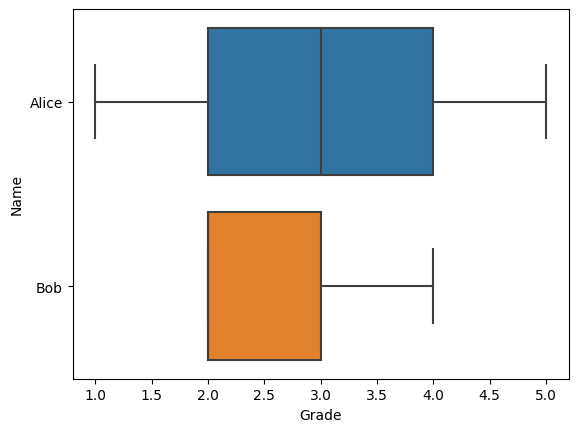

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Grade': [1, 2, 3, 4, 5, 2],
    'Name': ['Alice', 'Bob', 'Alice', 'Bob', 'Alice', 'Bob']
}
df = pd.DataFrame(data)

sns.boxplot(data=df, x='Grade', y='Name')
plt.show()


You could rewrite the DataFrame like this:
```python
import pandas as pd

data = {
    'Alice': [1, 3, 5],
    'Bob': [2, 4, 2],
}
df = pd.DataFrame(data)
```
Feels more natural, doesnt it?! Yes! Thats why the **wide format in the second example** is more common than the **long format used in the first example**.

**Problem: For plotting categorical variables in seaborn, DataFrames must be in the long format!**

So how do we get from the second DataFrame (wide) back to the first one (long) to get it ready for plotting? We use `pd.melt`:

```python
import pandas as pd

data = {
    'Alice': [1, 3, 5],
    'Bob': [2, 4, 2],
}
df = pd.DataFrame(data)

# Reshaping the DataFrame to long format
df = pd.melt(df, var_name='Name', value_name='Grade')
```

It seems trivial for such a short DataFrame but is a live saver for longer DataFrames!

## 3. Hue
The `hue` parameter allows you to introduce a third dimension to the scatter plot by mapping a categorical variable to the color of the data points. This helps in visually distinguishing different categories or groups within the data.

Lets try it:

<Axes: xlabel='X', ylabel='Y'>

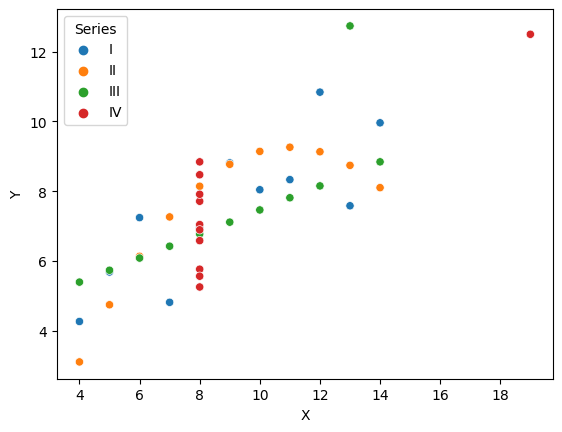

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_json('sample_data/anscombe.json')

sns.scatterplot(data=df, x='X', y='Y', hue='Series')

## 4. Customizing Plots

Seaborn plots can mostly be customized the same way we are used to it using Matplotlib.

To position seaborn plots, one can pass the subplot axis using the `ax` argument


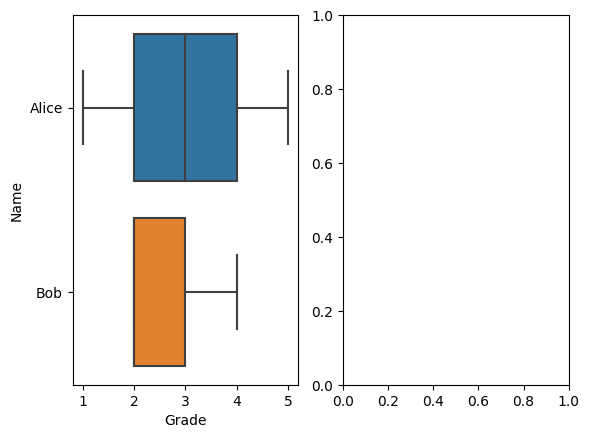

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Grade': [1, 2, 3, 4, 5, 2],
    'Name': ['Alice', 'Bob', 'Alice', 'Bob', 'Alice', 'Bob']
}
df = pd.DataFrame(data)

f, axs = plt.subplots(1, 2)
sns.boxplot(data=df, x='Grade', y='Name', ax=axs[0])
plt.show()

This way we can apply everything we learned about customization in Matplotlib to Seaborn plots:

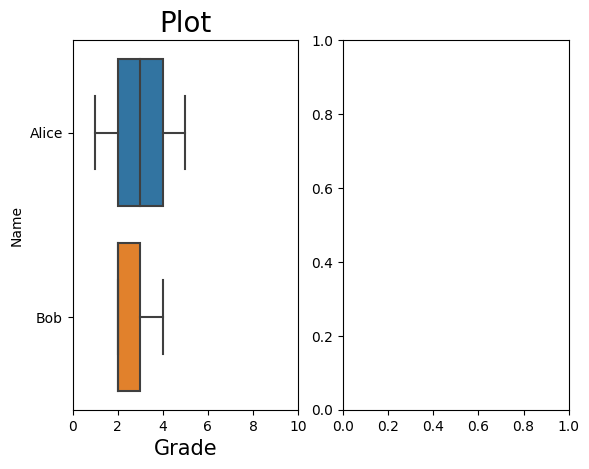

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Grade': [1, 2, 3, 4, 5, 2],
    'Name': ['Alice', 'Bob', 'Alice', 'Bob', 'Alice', 'Bob']
}
df = pd.DataFrame(data)

f, axs = plt.subplots(1, 2)
sns.boxplot(data=df, x='Grade', y='Name', ax=axs[0])
axs[0].set_title('Plot', size=20)
axs[0].set_xlim(0, 10)
axs[0].set_xlabel('Grade', size=15)
plt.show()

## Exercise 1

Redo Exercise 1 of the Matplotlib notebook using Seaborn plotting functions.

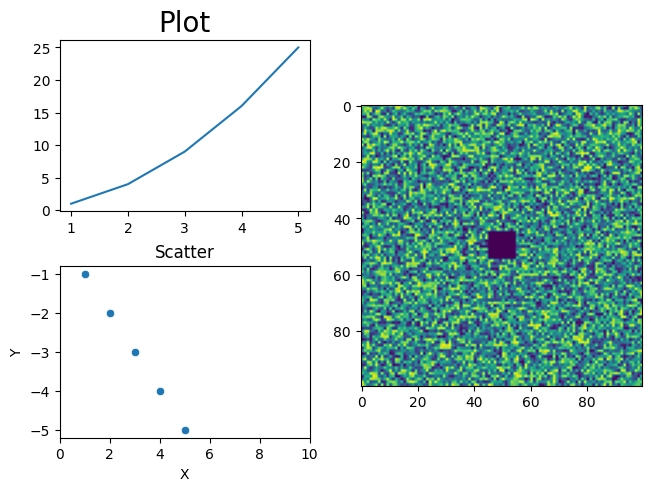

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
df = pd.DataFrame({'X': x, 'Y': -x, 'Y_': x**2})
array = np.random.rand(100, 100)
array[45:55, 45:55] = 0.

# Create a figure with constrained layout (automatic layout adjustments)
fig = plt.figure(constrained_layout=True)
subfigs = fig.subfigures(1, 2)  # nrows=2, ncols=1

# Create subplots within first subfigure
axs = subfigs[0].subplots(2, 1)  # nrows=1, ncols=2
# Plot in first subplot
sns.lineplot(df, x='X', y='Y_', ax=axs[0])
# sns.lineplot(x=x, y=x**2, ax=axs[0])
# Scatter in second subplot
sns.scatterplot(df, x='X', y='Y', ax=axs[1])
# Customize subplots as needed
axs[0].set_title('Plot', size=20)
axs[1].set_title('Scatter')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[1].set_xlim(0, 10)

# Create single subplots within second subfigure
ax = subfigs[1].subplots(1)
# Plot image in subplot
ax.imshow(array)

plt.show()

## Exercise 2

1. Plot the distribution of all features in the housing dataset. Are they normally distributed?

2. Write a function which applies the logarithm function `np.log` to all columns of a DataFrame and renames the columns such that e.g. "latitude" becomes "latitude_log".

3. Apply the function you wrote in 2. and repeat 1. with the resulting DataFrame?

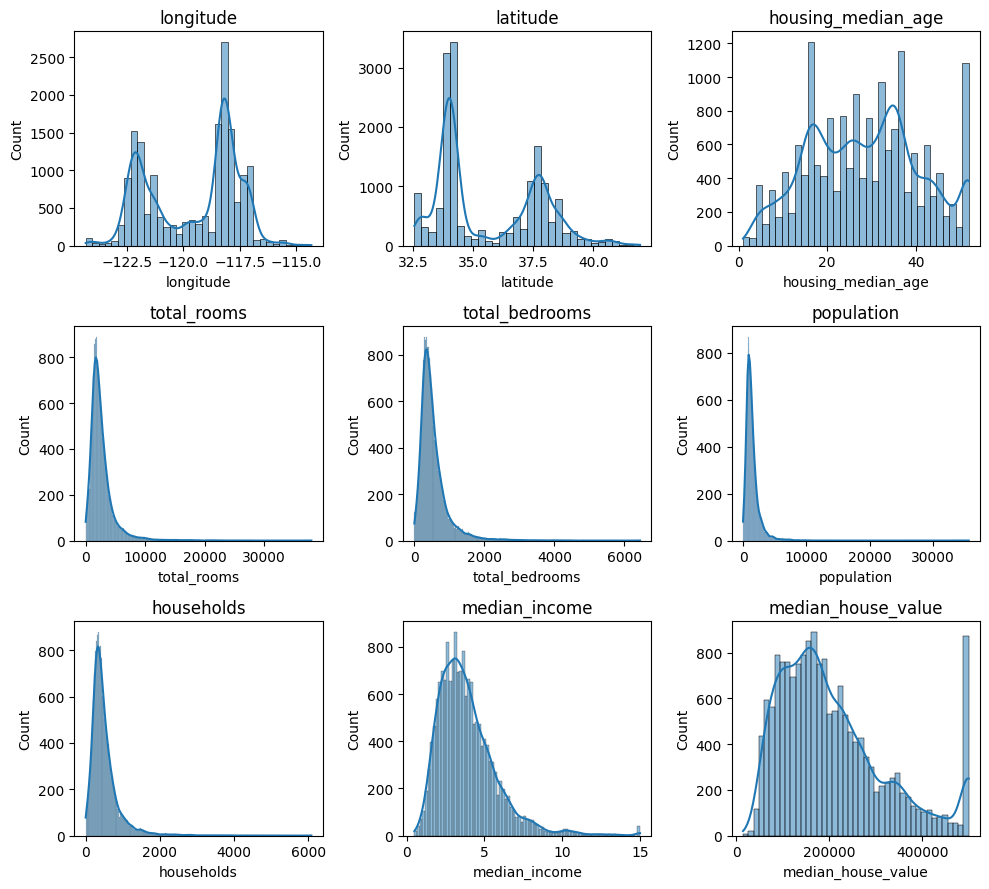

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('sample_data/california_housing_train.csv')

f, axs = plt.subplots(3, 3, figsize=(10, 9))

for c, ax in zip(df.columns, axs.flatten()):
  sns.histplot(x=df[c], ax=ax, kde=True).set(title=c)

plt.tight_layout()
plt.show()


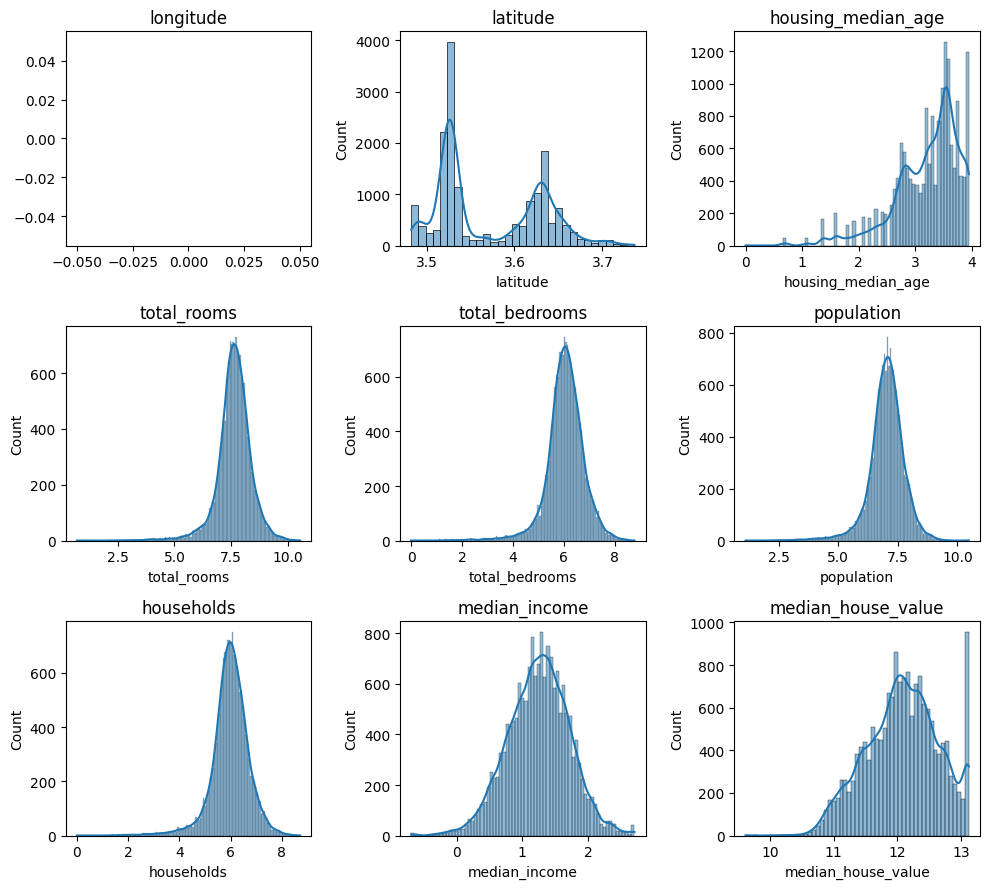

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('sample_data/california_housing_train.csv')

f, axs = plt.subplots(3, 3, figsize=(10, 9))

for c, ax in zip(df.columns, axs.flatten()):
  sns.histplot(x=df[c].apply(lambda x: np.log(x)), ax=ax, kde=True).set(title=c)

plt.tight_layout()
plt.show()